In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('https://pkgstore.datahub.io/machine-learning/credit-approval/credit-approval_csv/data/d54e382cd0dafb63b915f9bbb0b7bb20/credit-approval_csv.csv')

In [3]:
df.isnull().sum()

A1       12
A2       12
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14      13
A15       0
class     0
dtype: int64

In [4]:
df['class'].value_counts()

-    383
+    307
Name: class, dtype: int64

In [5]:
df['class'] = df['class'].replace('+', 1).replace('-', 0)

In [6]:
df.isnull().sum()

A1       12
A2       12
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14      13
A15       0
class     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1       678 non-null object
A2       678 non-null float64
A3       690 non-null float64
A4       684 non-null object
A5       684 non-null object
A6       681 non-null object
A7       681 non-null object
A8       690 non-null float64
A9       690 non-null object
A10      690 non-null object
A11      690 non-null int64
A12      690 non-null object
A13      690 non-null object
A14      677 non-null float64
A15      690 non-null int64
class    690 non-null int64
dtypes: float64(4), int64(3), object(9)
memory usage: 86.3+ KB


In [8]:
df['A4'].value_counts().sort_values(ascending=False).index[0]

'u'

In [9]:
# fill columns with objects/strings with most common value in column
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = df[col].fillna(df[col].value_counts().sort_values(ascending=False).index[0])

In [10]:
# fill columns that do not contain objects/strings with most common value in column (mode)
for col in df.columns:
    if df[col].dtypes != 'object':
        df[col] = df[col].fillna(df[col].value_counts().sort_values(ascending=False).iloc[0])

In [11]:
# check if all fields are filled
df.isnull().sum()

A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
A11      0
A12      0
A13      0
A14      0
A15      0
class    0
dtype: int64

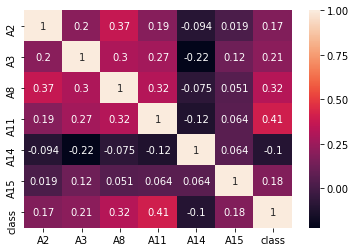

In [12]:
# check correlations between attributes in seaborn heatmap
sns.heatmap(df.corr(), annot=True)

In [13]:
# created separate dataframe with objects columns only
df_object = df.select_dtypes(include='object')

In [14]:
# create new instance with all objects as dummy data
df_object = pd.get_dummies(df_object, drop_first=True)

In [15]:
# check df_object
df_object

,A1_b,A4_u,A4_y,A5_gg,A5_p,A6_c,A6_cc,A6_d,A6_e,A6_ff,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
6,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
7,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
8,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,1,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [16]:
# create pandas dataframe with numeric columns only
df = df.select_dtypes(include=np.number)

In [17]:
# merge both dataframes in one
df = pd.merge(df, df_object, left_index=True, right_index=True)

In [18]:
# create different instances for X and y
X = df.drop('class', axis=1)
y = df['class']

# check length of df/Series
print(len(X))
print(len(y))


690
690


In [19]:
# use train_test_split for creating train and test sets
from sklearn.model_selection import train_test_split

In [20]:
# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [21]:
# predict with sklearn.linear_model
from sklearn.linear_model import LogisticRegression

In [22]:
# create instance
lr = LogisticRegression()

In [23]:
y_train.head()

468    0
417    0
116    0
228    1
306    0
Name: class, dtype: int64

In [24]:
# fit model
lr.fit(X_train, y_train)

/Users/melissabracamonte/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
# predict with linear regression
lr_pred = lr.predict(X_test)

In [26]:
# get an idea of predictions
lr_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [27]:
# import metrics from sklearn
import sklearn.metrics

In [28]:
# create classification report
print(sklearn.metrics.classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85       151
           1       0.80      0.87      0.83       125

   micro avg       0.84      0.84      0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



In [29]:
# calculate mean absolute error for predictions
sklearn.metrics.mean_absolute_error(y_test,lr_pred)

0.15942028985507245

In [30]:
# calculate RMSE (Root Mean Squated Error)
np.sqrt(sklearn.metrics.mean_squared_error(y_test,lr_pred))

0.3992747047523452

In [31]:
# calculate RMSE manually
np.sqrt(np.mean((y_test - lr_pred)**2))

0.3992747047523452

In [32]:
# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
# create instance with 1,000 estimators
rfc = RandomForestClassifier(n_estimators=1000)

In [34]:
# fit model
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
# create predictions
rfc_pred = rfc.predict(X_test)

In [36]:
# calculate RMSE manually
np.sqrt(np.mean((rfc_pred - y_test))**2)

0.021739130434782608

In [37]:
# create classification report
print(sklearn.metrics.classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       151
           1       0.84      0.88      0.86       125

   micro avg       0.87      0.87      0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



In [38]:
print(sklearn.metrics.classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85       151
           1       0.80      0.87      0.83       125

   micro avg       0.84      0.84      0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(y_test, rfc_pred)

array([[130,  21],
       [ 15, 110]])

In [42]:
confusion_matrix(y_test, lr_pred)

array([[123,  28],
       [ 16, 109]])

In [41]:
print(np.sqrt(np.mean((y_test - lr_pred)**2)))
print(np.sqrt(np.mean((y_test - rfc_pred)**2)))

0.3992747047523452
0.3611575592573076


The best prediction method for this dataset seems to be the Random Forest Classifier

<b>RMSE</b><br>
Logistic Regression: 0.3992747047523452<br>
Random Forest Classifier: 0.3661392781640516<br>

All scores in the classification reports are aiming towards the Random Forest Classifier model!